# The Idea Behind the Metric
    - We are taking a look at a smoking rates census taken from 2006 to 2010. I would imagine that data has not changed too much since then, therefore it is still relevent. The higher the smoking rate in a given neighborhood, the less healthy that neighborhood is considered. I will convert the census data into a data frame, taking the average of each neighborhood's smoking rates. I will then create a graph to display the data.

In [2]:
import fpsnippets as fp
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
smoking_rates = pd.read_csv("smoking_data.csv")

neighborhood_data = dict()
i = 0

while i < len(smoking_rates):
    
    census_data = fp.census_to_neighborhoods(smoking_rates.at[i, 'tractfips'])
    
    if census_data == None:
        i+=1
        continue
    
    else:
        for hood_name in census_data:

            if hood_name in neighborhood_data:
                neighborhood_data[hood_name][0] = neighborhood_data[hood_name][0] + smoking_rates.at[i, 'estimated smoking prevalence, 2006-2010']
                neighborhood_data[hood_name][1] = neighborhood_data[hood_name][1] + 1

            else:
                neighborhood_data[hood_name] = [smoking_rates.at[i, 'estimated smoking prevalence, 2006-2010'], 1]
        i+=1
        
    
print(neighborhood_data)

{'Bedford Dwellings': [3.6726457149999994, 16], 'Middle Hill': [1.4719761820000001, 6], 'North Oakland': [3.6726457149999994, 16], 'Lower Lawrenceville': [6.478483086000001, 27], 'Bluff': [3.6726457149999994, 16], 'Polish Hill': [5.946294654000001, 25], 'Central Business District': [1.4719761820000001, 6], 'South Side Slopes': [5.820750248, 22], 'West End': [4.368284642, 19], 'Crawford-Roberts': [1.4719761820000001, 6], 'South Oakland': [4.158892527999999, 18], 'Upper Hill': [3.6726457149999994, 16], 'South Shore': [3.6503704330000004, 15], 'Chateau': [5.421161643000001, 21], 'West Oakland': [3.6726457149999994, 16], 'Strip District': [3.7456251210000002, 15], 'Terrace Village': [3.6726457149999994, 16], 'South Side Flats': [5.820750248, 22], 'Garfield': [6.330560320000001, 29], 'East Liberty': [6.496116527999999, 30], 'Morningside': [5.798371888000001, 27], 'Bloomfield': [8.696786061, 40], 'Central Lawrenceville': [2.805837371, 11], 'Stanton Heights': [6.330560320000001, 29], 'Upper L

# Interpreting this Code:
    - I am adding every name of the neighborhood to a dictionary as a key. Then, I am setting the value of that key as a list. The first item in the list is the sum of the smoking rates data gathered for that neighborhood and the second item is how many times data from that neighborhood was collected. Essentially, I will take the average of the sum of the smoking rate with how many times the data from that neighborhood was taken to get the average smoking rate per-neighborhood.

In [33]:
temp_dict = dict()
temp_list = list()

for key in neighborhood_data:
    temp_dict[key] = neighborhood_data[key][0] / neighborhood_data[key][1]

smoking = pd.DataFrame(
    {
        'hoods' : temp_dict.keys(),
        'avg smoking rate' : temp_dict.values()
    }
)

sorted_smoking = smoking.sort_values('avg smoking rate', ascending = True)
display(sorted_smoking)

,hoods,avg smoking rate
43,Glen Hazel,0.185913
32,Point Breeze,0.191285
44,Swisshelm Park,0.192894
31,Friendship,0.194225
45,Regent Square,0.195695
...,...,...
49,Arlington Heights,0.271798
86,Summer Hill,0.274942
53,Knoxville,0.275128
59,Mt. Oliver,0.275128


# Converting the dictionary to a Dataframe:
    - After getting the average smoking rate, I am adding the average to a temporary dictionary with a key of the same neighborhood. I will then use this temporary dictionary to create my dataframe. I also sorted the dataframe to give me the neighborhoods with the highest lowest smoking rate.

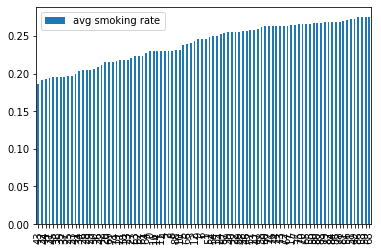

In [34]:
sorted_smoking.plot(kind = 'bar')

This plot just mainly visualizes the entire dataset in a sorted manor.

# Conclusion
    - From this data, we can see the top 5 neighborhoods with the lowest average smoking rate is Glen Hazel with 0.185913, Point Breeze with 0.191285, Swisshelm Park with 0.192894, Friendship with 0.194225, and Regent Square with 0.195695. The neighorhoods with the highest smoking rates were Esplen with 0.275161, Knoxville with 0.275128, Mt. Oliver with 0.275128, Summer Hill with 0.274942, and Arlington with 0.271798.